In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
OnTimeData = pd.read_csv('Sample_2011_2016_car-mark-lat-long')

In [3]:
#We need to get rid of the two separate values for ExpressJet
OnTimeData["Carrier Name"] = OnTimeData["Carrier Name"].replace("ExpressJet Airlines Inc. (1)",
                                                               "ExpressJet Airlines Inc.")

In [3]:
"""1. A first look at the data"""
OnTimeData.head()

,Unnamed: 0,Unnamed: 0.1,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,...,iata_faa_x,orig_lat,orig_long,orig_elev,orig_zone,iata_faa_y,dest_lat,dest_long,dest_elev,dest_zone
0,0,0,2011,2,6,26,7,2011-06-26,MQ,20398,...,ORD,41.978603,-87.904842,668,-6,IAH,29.984433,-95.341442,97,-6
1,1,1,2011,2,6,16,4,2011-06-16,MQ,20398,...,ORD,41.978603,-87.904842,668,-6,IAH,29.984433,-95.341442,97,-6
2,2,2,2011,2,6,30,4,2011-06-30,MQ,20398,...,ORD,41.978603,-87.904842,668,-6,IAH,29.984433,-95.341442,97,-6
3,3,3,2011,2,6,30,4,2011-06-30,MQ,20398,...,ORD,41.978603,-87.904842,668,-6,IAH,29.984433,-95.341442,97,-6
4,4,4,2011,2,6,7,2,2011-06-07,MQ,20398,...,ORD,41.978603,-87.904842,668,-6,IAH,29.984433,-95.341442,97,-6


In [4]:
OnTimeData.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Year', u'Quarter', u'Month',
       u'DayofMonth', u'DayOfWeek', u'FlightDate', u'UniqueCarrier',
       u'AirlineID', u'Carrier', u'TailNum', u'FlightNum', u'OriginAirportID',
       u'OriginAirportSeqID', u'OriginCityMarketID', u'Origin',
       u'OriginCityName', u'OriginState', u'OriginStateFips',
       u'OriginStateName', u'OriginWac', u'DestAirportID', u'DestAirportSeqID',
       u'DestCityMarketID', u'Dest', u'DestCityName', u'DestState',
       u'DestStateFips', u'DestStateName', u'DestWac', u'CRSDepTime',
       u'DepTime', u'DepDelay', u'DepDelayMinutes', u'DepDel15',
       u'DepartureDelayGroups', u'DepTimeBlk', u'TaxiOut', u'WheelsOff',
       u'WheelsOn', u'TaxiIn', u'CRSArrTime', u'ArrTime', u'ArrDelay',
       u'ArrDelayMinutes', u'ArrDel15', u'ArrivalDelayGroups', u'ArrTimeBlk',
       u'Cancelled', u'CancellationCode', u'CRSElapsedTime',
       u'ActualElapsedTime', u'AirTime', u'Flights', u'Distance',
       u'DistanceGroup',

In [5]:
"""2. Descriptive statistics"""
#Count arrival delay 15-minute groups as a percentage of the data
OnTimeData.ArrivalDelayGroups.value_counts(normalize=True, sort=False)

 0     0.209198
 1     0.073401
 2     0.035510
 3     0.020984
 4     0.013770
 5     0.009824
 6     0.007123
 7     0.005343
 8     0.004101
 9     0.003149
 10    0.002423
 11    0.001849
 12    0.007448
-2     0.168844
-1     0.419061
Name: ArrivalDelayGroups, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002A295978>]], dtype=object)

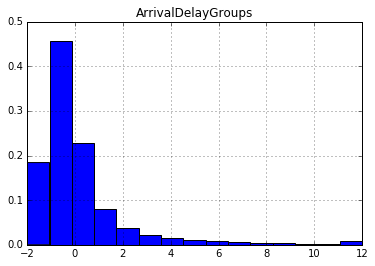

In [7]:
#Histogram of arrival delay 15-minute groups
OnTimeData.hist("ArrivalDelayGroups", bins=15, normed=True)

In [8]:
#Percentage of flights delayed at least 15 minutes
np.mean(OnTimeData.ArrDel15)

0.18831115593050807

In [9]:
#List airlines by number of flights in the data set
OnTimeData["Carrier Name"].value_counts()

Southwest Airlines Co.          297094
Delta Air Lines Inc.            197870
ExpressJet Airlines Inc.        156876
SkyWest Airlines Inc.           151260
American Airlines Inc.          151075
United Air Lines Inc.           122357
Envoy Air                        92879
US Airways Inc.                  83070
JetBlue Airways                  61702
Alaska Airlines Inc.             39916
AirTran Airways Corporation      31224
Frontier Airlines Inc.           20858
Hawaiian Airlines Inc.           18486
Mesa Airlines Inc.               18364
Virgin America                   12936
ExpressJet Airlines Inc. (1)     12254
Spirit Air Lines                  8480
Continental Air Lines Inc.        7201
Endeavor Air Inc.                 6532
Name: Carrier Name, dtype: int64

In [21]:
OnTimeData["Carrier Name"].value_counts()

Southwest Airlines Co.         297094
Delta Air Lines Inc.           197870
ExpressJet Airlines Inc.       169130
SkyWest Airlines Inc.          151260
American Airlines Inc.         151075
United Air Lines Inc.          122357
Envoy Air                       92879
US Airways Inc.                 83070
JetBlue Airways                 61702
Alaska Airlines Inc.            39916
AirTran Airways Corporation     31224
Frontier Airlines Inc.          20858
Hawaiian Airlines Inc.          18486
Mesa Airlines Inc.              18364
Virgin America                  12936
Spirit Air Lines                 8480
Continental Air Lines Inc.       7201
Endeavor Air Inc.                6532
Name: Carrier Name, dtype: int64

In [22]:
#Airlines by percentage of flights
OnTimeData["Carrier Name"].value_counts(normalize=True)

Southwest Airlines Co.         0.199334
Delta Air Lines Inc.           0.132760
ExpressJet Airlines Inc.       0.113477
SkyWest Airlines Inc.          0.101487
American Airlines Inc.         0.101363
United Air Lines Inc.          0.082095
Envoy Air                      0.062317
US Airways Inc.                0.055735
JetBlue Airways                0.041399
Alaska Airlines Inc.           0.026781
AirTran Airways Corporation    0.020950
Frontier Airlines Inc.         0.013995
Hawaiian Airlines Inc.         0.012403
Mesa Airlines Inc.             0.012321
Virgin America                 0.008679
Spirit Air Lines               0.005690
Continental Air Lines Inc.     0.004831
Endeavor Air Inc.              0.004383
Name: Carrier Name, dtype: float64

In [23]:
#List airlines by percentage of flights delayed 15 minutes
OnTimeData.groupby("Carrier Name").mean()["ArrDel15"].sort_values(ascending=False)

Carrier Name
Spirit Air Lines               0.299121
Frontier Airlines Inc.         0.240126
JetBlue Airways                0.224305
ExpressJet Airlines Inc.       0.223300
Envoy Air                      0.217871
Continental Air Lines Inc.     0.211998
United Air Lines Inc.          0.204212
American Airlines Inc.         0.198692
Southwest Airlines Co.         0.194953
SkyWest Airlines Inc.          0.183913
Virgin America                 0.181485
Endeavor Air Inc.              0.172435
US Airways Inc.                0.168809
Mesa Airlines Inc.             0.160941
AirTran Airways Corporation    0.151417
Delta Air Lines Inc.           0.140672
Alaska Airlines Inc.           0.120817
Hawaiian Airlines Inc.         0.079330
Name: ArrDel15, dtype: float64

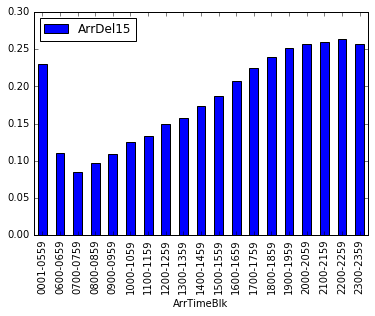

In [12]:
#Arrival delay rates by scheduled arrival time
OnTimeData.groupby("ArrTimeBlk").mean().plot(y='ArrDel15', kind='bar')

#Obvious pattern: more delays later in the day, tapering off slightly late at night.

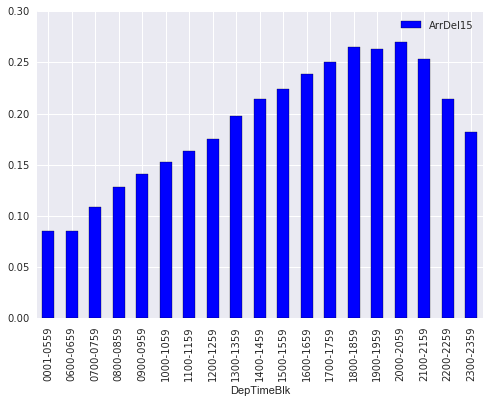

In [37]:
#By scheduled departure time
OnTimeData.groupby("DepTimeBlk").mean().plot(y='ArrDel15', kind='bar')

In [13]:
#Distribution of arrival times by airline: see individual graphs.  Here is the code used to create them:
"""
airlines = OnTimeData["Carrier Name"].unique()
i = 0
while i in range(len(airlines)):
    a = airlines[i]
    airframe = OnTimeData[OnTimeData["Carrier Name"] == a]
    #need "dropna" to avoid error
    fig = sns.distplot(airframe["ArrivalDelayGroups"].dropna(), norm_hist=True, kde=False, 
                 bins=15, axlabel="Arrival delay groups for "+a).get_figure()
    #fig.set_title('Arrival delay groups for %s' % a)
    fig.savefig('Delays %s.png' % a)
    fig.clf()
    i += 1
"""

'\nairlines = OnTimeData["Carrier Name"].unique()\ni = 0\nwhile i in range(len(airlines)):\n    a = airlines[i]\n    airframe = OnTimeData[OnTimeData["Carrier Name"] == a]\n    #need "dropna" to avoid error\n    fig = sns.distplot(airframe["ArrivalDelayGroups"].dropna(), norm_hist=True, kde=False, \n                 bins=15, axlabel="Arrival delay groups for "+a).get_figure()\n    #fig.set_title(\'Arrival delay groups for %s\' % a)\n    fig.savefig(\'Delays %s.png\' % a)\n    fig.clf()\n    i += 1\n'

In [24]:
#Airlines sorted by average delay time
OnTimeData.groupby("Carrier Name").mean()["ArrDelay"].sort_values()

Carrier Name
Alaska Airlines Inc.           -1.419754
Delta Air Lines Inc.            0.607397
Hawaiian Airlines Inc.          0.626722
Endeavor Air Inc.               1.855884
US Airways Inc.                 2.104551
AirTran Airways Corporation     2.157862
Mesa Airlines Inc.              3.697042
United Air Lines Inc.           4.686844
Virgin America                  5.155826
Southwest Airlines Co.          5.185645
American Airlines Inc.          5.281326
SkyWest Airlines Inc.           5.449992
Continental Air Lines Inc.      5.930318
JetBlue Airways                 7.076660
Envoy Air                       7.231829
ExpressJet Airlines Inc.        8.493537
Frontier Airlines Inc.         10.371366
Spirit Air Lines               14.534153
Name: ArrDelay, dtype: float64

In [15]:
#Top 10 cities by number of destination flights
dest_city_counts = OnTimeData.DestCityName.value_counts()
dest_city_counts.head(10)

Chicago, IL              96839
Atlanta, GA              95761
Dallas/Fort Worth, TX    66556
Houston, TX              56714
Denver, CO               56314
Los Angeles, CA          54317
New York, NY             50868
Phoenix, AZ              42896
San Francisco, CA        41218
Las Vegas, NV            35619
Name: DestCityName, dtype: int64

In [16]:
#Top 10 destination cities by 15-min arrival delay rate
dest_city_rates = OnTimeData.groupby("DestCityName").mean()["ArrDel15"].sort_values(ascending=False)
dest_city_rates.head(10)

DestCityName
Topeka, KS                  0.473684
Wilmington, DE              0.411765
Crescent City, CA           0.401198
St. Augustine, FL           0.346154
Guam, TT                    0.340909
Beaumont/Port Arthur, TX    0.335079
St. Cloud, MN               0.333333
Hyannis, MA                 0.333333
Chico, CA                   0.321053
Redding, CA                 0.318841
Name: ArrDel15, dtype: float64

In [17]:
#Bottom 10 destination cities by 15-min arrival delay rate
dest_city_rates.tail(10)

DestCityName
Bemidji, MN             0.071429
Yakutat, AK             0.069519
Aberdeen, SD            0.067568
Pocatello, ID           0.065327
Vernal, UT              0.064516
West Yellowstone, MT    0.062500
Cheyenne, WY            0.062500
Lewiston, ID            0.042683
Staunton, VA            0.000000
King Salmon, AK         0.000000
Name: ArrDel15, dtype: float64

In [18]:
#Top 10 destination cities by average delay time
dest_city_averages = OnTimeData.groupby("DestCityName").mean()["ArrDelay"].sort_values(ascending=False)
dest_city_averages.head(10)

DestCityName
Topeka, KS                  35.947368
Hattiesburg/Laurel, MS      28.921569
Wilmington, DE              28.725490
Guam, TT                    22.738636
Crescent City, CA           21.197605
Beaumont/Port Arthur, TX    18.921466
Redding, CA                 18.050725
Modesto, CA                 17.682171
Chico, CA                   17.621053
Trenton, NJ                 17.103093
Name: ArrDelay, dtype: float64

In [19]:
#Bottom 10 destination cities by average delay time
dest_city_averages.tail(10)

DestCityName
Devils Lake, ND              -6.288462
Iron Mountain/Kingsfd, MI    -6.342342
King Salmon, AK              -6.363636
Bellingham, WA               -7.066372
International Falls, MN      -7.190909
Yakutat, AK                  -8.101604
Lewiston, ID                 -8.158537
Staunton, VA                 -9.333333
Vernal, UT                   -9.838710
Del Rio, TX                 -12.625000
Name: ArrDelay, dtype: float64

In [20]:
#Top 10 origin cities by 15-min arrival delay rate
orig_city_rates = OnTimeData.groupby("OriginCityName").mean()["ArrDel15"].sort_values(ascending=False)
orig_city_rates.head(10)

OriginCityName
Crescent City, CA          0.424419
Martha's Vineyard, MA      0.390244
North Bend/Coos Bay, OR    0.359375
Dillingham, AK             0.357143
Wilmington, DE             0.338710
Modesto, CA                0.335366
Adak Island, AK            0.333333
Staunton, VA               0.333333
Mammoth Lakes, CA          0.326087
Muskegon, MI               0.298013
Name: ArrDel15, dtype: float64

In [21]:
#Bottom 10 origin cities by 15-min arrival delay rate
orig_city_rates.tail(10)

OriginCityName
Cedar City, UT          0.070588
Jamestown, ND           0.063291
Elko, NV                0.050000
West Yellowstone, MT    0.050000
Lewisburg, WV           0.047619
Lewiston, ID            0.040936
Butte, MT               0.040462
Inyokern, CA            0.012821
Moab, UT                0.000000
Rockford, IL            0.000000
Name: ArrDel15, dtype: float64

In [22]:
#Top 10 origin cities by average delay time
orig_city_averages = OnTimeData.groupby("OriginCityName").mean()["ArrDelay"].sort_values(ascending=False)
orig_city_averages.head(10)

OriginCityName
St. Cloud, MN              32.727273
Crescent City, CA          29.011628
Martha's Vineyard, MA      26.878049
Wilmington, DE             26.403226
St. Augustine, FL          25.600000
North Bend/Coos Bay, OR    22.515625
Modesto, CA                19.006098
Redding, CA                18.583643
Hancock/Houghton, MI       18.482759
Arcata/Eureka, CA          18.460366
Name: ArrDelay, dtype: float64

In [23]:
#Bottom 10 origin cities by average delay time
orig_city_averages.tail(10)

OriginCityName
Cordova, AK             -5.227027
Helena, MT              -5.905028
Brainerd, MN            -6.284672
West Yellowstone, MT    -6.733333
Watertown, NY           -8.180556
Butte, MT               -9.491329
Inyokern, CA            -9.974359
Rockford, IL           -10.200000
Lewisburg, WV          -15.238095
Moab, UT               -15.451613
Name: ArrDelay, dtype: float64

In [24]:
#Many of the cities in the above lists are small and obscure.  Let's find a reasonable definition for a "large" airport.
dest_city_counts = OnTimeData.DestCityName.value_counts()
dest_city_counts.head(10)

Chicago, IL              96839
Atlanta, GA              95761
Dallas/Fort Worth, TX    66556
Houston, TX              56714
Denver, CO               56314
Los Angeles, CA          54317
New York, NY             50868
Phoenix, AZ              42896
San Francisco, CA        41218
Las Vegas, NV            35619
Name: DestCityName, dtype: int64

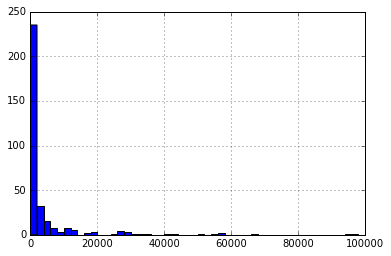

In [25]:
#All cities are under 100,000, so let's make a histogram with 50 bins going up to 100,000
dest_city_counts.hist(range=(0, 100000), bins=50)

In [4]:
#Most cities are in the first bin (under 2,000), so let's restrict to cities with over 2,000 departures

#New column for arriving flights by city
OnTimeData["ArrFlightsPerCity"] = OnTimeData.groupby('DestCityName')["DestCityName"].transform('count')

#Top 10 "large" destination cities by 15-min arrival delay rate
lg_dest_city_rates = OnTimeData[OnTimeData["ArrFlightsPerCity"] > 2000].groupby("DestCityName") \
    .mean()["ArrDel15"].sort_values(ascending=False)
lg_dest_city_rates.head(10)

DestCityName
Knoxville, TN           0.261884
San Francisco, CA       0.259590
Newark, NJ              0.256223
Colorado Springs, CO    0.232099
Tulsa, OK               0.228763
Little Rock, AR         0.228751
Baton Rouge, LA         0.228079
Fayetteville, AR        0.227697
New York, NY            0.226874
Oklahoma City, OK       0.226355
Name: ArrDel15, dtype: float64

In [5]:
#Bottom 10 large destination cities by 15-min arrival delay rate
lg_dest_city_rates.tail(10)

DestCityName
Burbank, CA           0.151682
Minneapolis, MN       0.149928
Phoenix, AZ           0.147668
Santa Ana, CA         0.146059
Honolulu, HI          0.138209
Long Beach, CA        0.132636
Salt Lake City, UT    0.123120
Kahului, HI           0.112535
Kona, HI              0.111616
Lihue, HI             0.100417
Name: ArrDel15, dtype: float64

In [6]:
#Top 10 large destination cities by average delay time
lg_dest_city_averages = OnTimeData[OnTimeData["ArrFlightsPerCity"] > 2000].groupby("DestCityName") \
    .mean()["ArrDelay"].sort_values(ascending=False)
lg_dest_city_averages.head(10)

DestCityName
Knoxville, TN           12.259683
San Francisco, CA       10.296362
Newark, NJ               9.722555
Colorado Springs, CO     9.552675
Wichita, KS              8.595087
Oklahoma City, OK        8.126632
Baton Rouge, LA          7.963001
Fayetteville, AR         7.935050
El Paso, TX              7.891127
Little Rock, AR          7.870222
Name: ArrDelay, dtype: float64

In [7]:
#Bottom 10 large destination cities by average delay time
lg_dest_city_averages.tail(10)

DestCityName
Detroit, MI           1.668989
Minneapolis, MN       1.603056
Long Beach, CA        1.487681
Kahului, HI           1.446805
Phoenix, AZ           1.218193
Seattle, WA           1.184162
Santa Ana, CA         0.884978
Lihue, HI             0.441626
Anchorage, AK        -0.052557
Salt Lake City, UT   -0.202250
Name: ArrDelay, dtype: float64

In [8]:
#Number of departing flights per city
OnTimeData['DepFlightsPerCity'] = OnTimeData.groupby('OriginCityName')['OriginCityName'].transform('count')

#Top 10 "large" origin cities by 15-min arrival delay rate
lg_orig_city_rates = OnTimeData[OnTimeData["DepFlightsPerCity"] > 2000].groupby("OriginCityName") \
    .mean()["ArrDel15"].sort_values(ascending=False)
lg_orig_city_rates.head(10)

OriginCityName
Chicago, IL              0.246459
Newark, NJ               0.243358
San Francisco, CA        0.226197
Dallas/Fort Worth, TX    0.225685
White Plains, NY         0.221996
Denver, CO               0.220980
Miami, FL                0.220578
New York, NY             0.217625
Fayetteville, AR         0.216236
Baltimore, MD            0.216208
Name: ArrDel15, dtype: float64

In [9]:
#Bottom 10 large origin cities by 15-min arrival delay rate
lg_orig_city_rates.tail(10)

OriginCityName
Boise, ID             0.141738
Burbank, CA           0.129043
Portland, OR          0.128030
Salt Lake City, UT    0.123080
Anchorage, AK         0.112279
Honolulu, HI          0.106650
Spokane, WA           0.104562
Kahului, HI           0.099588
Lihue, HI             0.094640
Kona, HI              0.093424
Name: ArrDel15, dtype: float64

In [10]:
#Top 10 large origin cities by average delay time
lg_orig_city_averages = OnTimeData[OnTimeData["DepFlightsPerCity"] > 2000].groupby("OriginCityName") \
    .mean()["ArrDelay"].sort_values(ascending=False)
lg_orig_city_averages.head(10)

OriginCityName
Chicago, IL              9.167141
Santa Barbara, CA        8.919348
Baton Rouge, LA          8.825114
Knoxville, TN            8.705857
Fresno, CA               8.190534
Dallas/Fort Worth, TX    8.160374
San Francisco, CA        8.013136
Fayetteville, AR         7.796483
White Plains, NY         7.176171
Savannah, GA             7.156038
Name: ArrDelay, dtype: float64

In [11]:
#Bottom 10 large origin cities by average delay time
lg_orig_city_averages.tail(10)

OriginCityName
Portland, OR          0.843595
Kahului, HI           0.802973
Kona, HI              0.798828
Manchester, NH        0.728004
Pittsburgh, PA        0.657656
Hartford, CT          0.361890
Salt Lake City, UT   -0.042338
Lihue, HI            -0.635685
Anchorage, AK        -0.828226
Spokane, WA          -0.859911
Name: ArrDelay, dtype: float64

In [ ]:
#Now let's do the same descriptive statistics for large "markets" instead of individual cities
OnTimeData['ArrFlightsPerMarket'] = OnTimeData.groupby('DestMarket')['DestMarket'].transform('count')
lg_dest_market_rates = OnTimeData[OnTimeData['ArrFlightsPerMarket'] > 2000].groupby('DestMarket') \
    .mean()['ArrDel15'].sort_values(ascending=False)

#Top 10 large destination markets by arrival delay rate
lg_dest_market_rates.head(10)

In [ ]:
#Bottom 10 large destination markets by arrival delay rate
lg_dest_market_rates.tail(10)

In [ ]:
lg_dest_market_averages = OnTimeData[OnTimeData['ArrFlightsPerMarket'] > 2000].groupby('DestMarket') \
    .mean()['ArrDelay'].sort_values(ascending=False)
#Top 10 large destination markets by average delay time
lg_dest_market_averages.head(10)

In [ ]:
#Bottom 10 large destination markets by average delay time
lg_dest_market_averages.tail(10)

In [ ]:
OnTimeData['DepFlightsPerMarket'] = OnTimeData.groupby('OrigMarket')['OrigMarket'].transform('count')
lg_orig_market_rates = OnTimeData[OnTimeData.DepFlightsPerMarket > 1000].groupby('OrigMarket'). \
    mean()['ArrDel15'].sort_values(ascending=False)
#Top 10 large origin markets by arrival delay rate
lg_orig_market_rates.head(10)

In [ ]:
#bottom 10 large origin markets by arrival delay rate
lg_orig_market_rates.tail(10)

In [ ]:
lg_orig_market_averages = OnTimeData[OnTimeData.DepFlightsPerMarket > 1000].groupby('OrigMarket'). \
    mean()['ArrDelay'].sort_values(ascending=False)
#Top 10 large origin markets by average delay
lg_orig_market_averages.head(10)

In [ ]:
lg_orig_market_averages.tail(10)

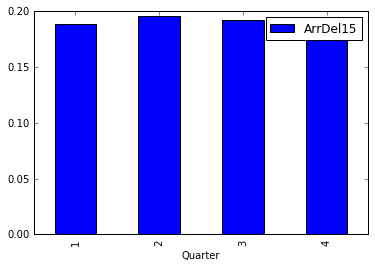

In [13]:
#We've thoroughly investigated which cities have the highest and lowest delay rates.
#Now look at delay rates by season, approximated by quarter.
#%matplotlib inline
OnTimeData.groupby("Quarter").mean().plot(y='ArrDel15', kind='bar')

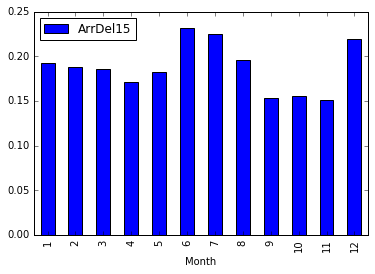

In [14]:
#More detailed seasonal rates: by month
OnTimeData.groupby("Month").mean().plot(y='ArrDel15', kind='bar')

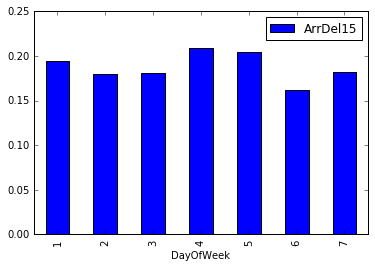

In [15]:
"""Hypothesis: busy flying seasons (June, July, December) seem to be more important than weather
in determining rates of flight delay.  That said, this could depend heavily on where the airport is located.
We will test this with regressions later."""

#Arrival delay rates by day of the week
OnTimeData.groupby("DayOfWeek").mean().plot(y='ArrDel15', kind='bar')

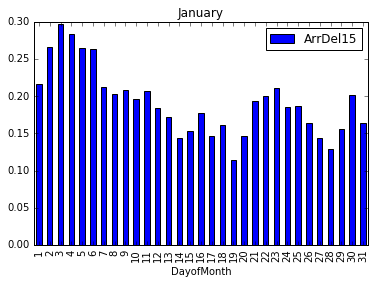

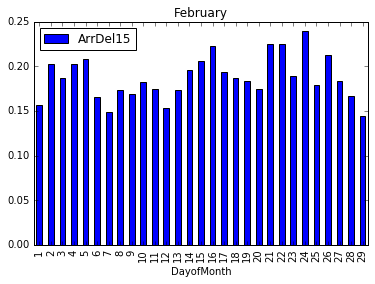

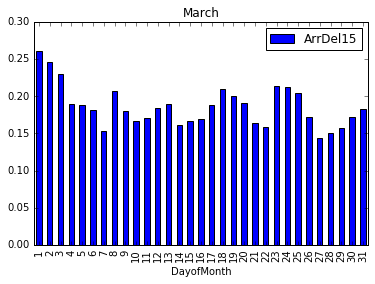

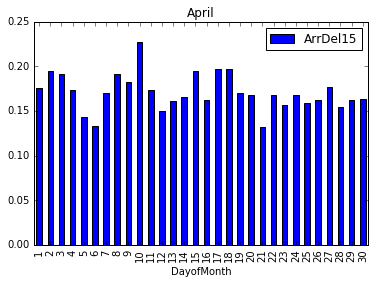

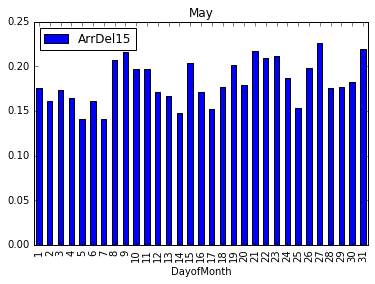

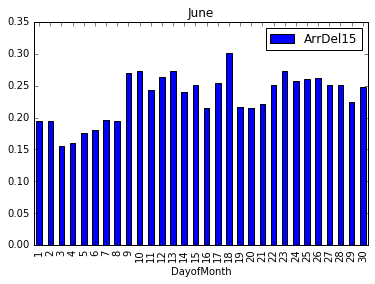

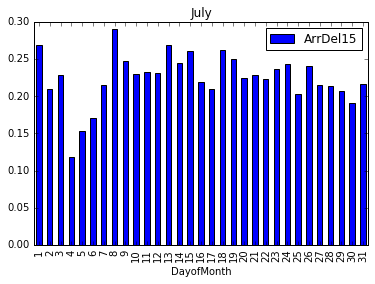

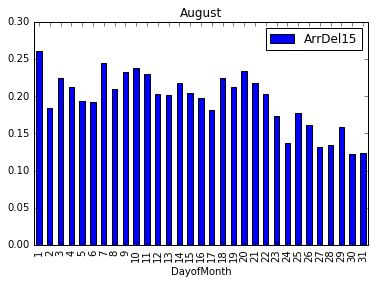

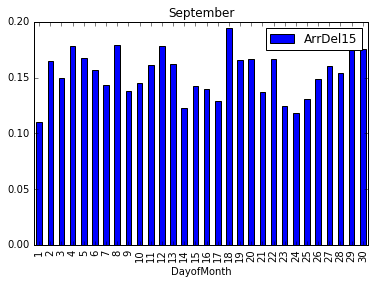

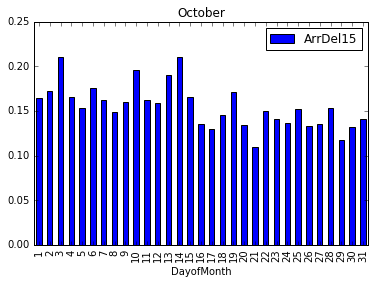

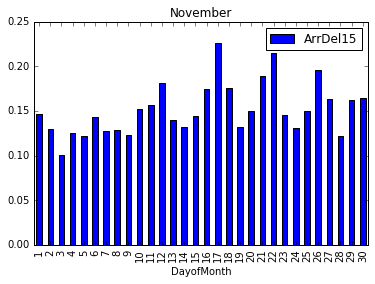

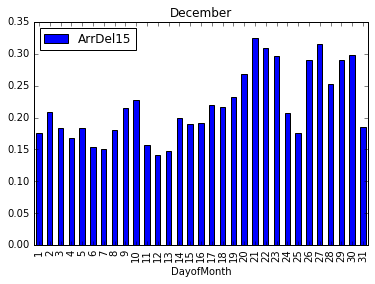

In [6]:
#Any special days of the year with higher or lower delay rates
MonthDict = {1: 'January',
            2: 'February', 
            3: 'March',
            4: 'April',
            5: 'May', 
            6: 'June', 
            7: 'July', 
            8: 'August', 
            9: 'September', 
            10: 'October', 
            11: 'November', 
            12: 'December'}

for m in range(1, 13):
    OnTimeData[OnTimeData.Month == m].groupby("DayofMonth").mean().plot(y='ArrDel15', kind='bar', title=MonthDict[m])

In [17]:
"""Note: flights right on Christmas Eve/Day and New Year's Eve/Day are less likely to be delayed, but flights
a few days before or after are the opposite.  The same is somewhat true of July 4.  Thanksgiving is a bit harder
to see because it's a different date every year - can look for the 4th Thursday in November later."""

#Check average number of flights per date
OnTimeData.shape

(1490434, 80)

In [18]:
1490434 / 365.4

4078.9107827038865

In [19]:
#4,000 flights per date is a decent sample size, but there are still seemingly random patterns

#Is there a clear time trend in arrival delay rates?  Use "FlightDate" variable!!

#Make new data frame with only time and arrival delay variables
TimeDF = OnTimeData[["FlightDate", "ArrDelay", "ArrDel15"]]
TimeDF.index = TimeDF.FlightDate
TimeDF.head()

,FlightDate,ArrDelay,ArrDel15
FlightDate,,,
2011-06-26,2011-06-26,-11,0
2011-06-16,2011-06-16,-2,0
2011-06-30,2011-06-30,-8,0
2011-06-30,2011-06-30,290,1
2011-06-07,2011-06-07,-21,0


In [20]:
TimeDF.index

Index([u'2011-06-26', u'2011-06-16', u'2011-06-30', u'2011-06-30',
       u'2011-06-07', u'2011-06-30', u'2011-06-21', u'2011-06-02',
       u'2011-07-14', u'2011-07-14',
       ...
       u'2012-06-22', u'2012-06-25', u'2012-07-07', u'2013-06-19',
       u'2014-08-09', u'2015-06-24', u'2015-06-28', u'2015-06-20',
       u'2015-08-11', u'2015-08-08'],
      dtype='object', name=u'FlightDate', length=1490434)

In [21]:
TimeDF.FlightDate = pd.to_datetime(TimeDF.FlightDate)

C:\Users\Will\Anaconda2\lib\site-packages\pandas\core\generic.py:2387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [22]:
TimeDF.FlightDate.head()

FlightDate
2011-06-26   2011-06-26
2011-06-16   2011-06-16
2011-06-30   2011-06-30
2011-06-30   2011-06-30
2011-06-07   2011-06-07
Name: FlightDate, dtype: datetime64[ns]

In [23]:
TimeDF.index = TimeDF.FlightDate

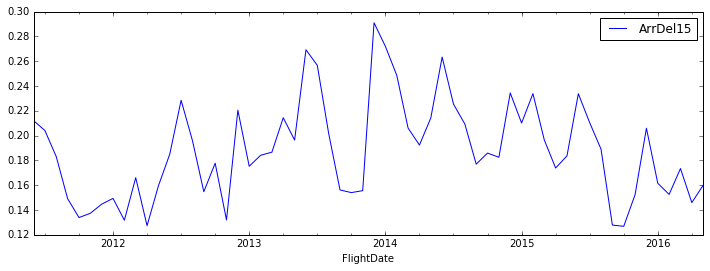

In [24]:
%matplotlib inline
TimeDF.resample('M', how='mean').plot(y='ArrDel15', kind='line', figsize=(12, 4))

In [25]:
#check for time trend using seaborn plot
import seaborn as sns
MonthsDF = TimeDF.resample('M', how='mean')
MonthsDF['FlightDate'] = MonthsDF.index
MonthsDF.head()
#sns.regplot(data=MonthsDF, x='FlightDate', y='ArrDel15')

C:\Users\Will\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,ArrDelay,ArrDel15,FlightDate
FlightDate,,,
2011-06-30,8.207758,0.212080,2011-06-30
2011-07-31,7.090081,0.204082,2011-07-31
2011-08-31,5.313149,0.182988,2011-08-31
2011-09-30,1.821429,0.149155,2011-09-30
2011-10-31,0.207725,0.133920,2011-10-31


In [26]:
MonthsDF.FlightDate.head()

FlightDate
2011-06-30   2011-06-30
2011-07-31   2011-07-31
2011-08-31   2011-08-31
2011-09-30   2011-09-30
2011-10-31   2011-10-31
Freq: M, Name: FlightDate, dtype: datetime64[ns]

TypeError: reduction operation 'mean' not allowed for this dtype

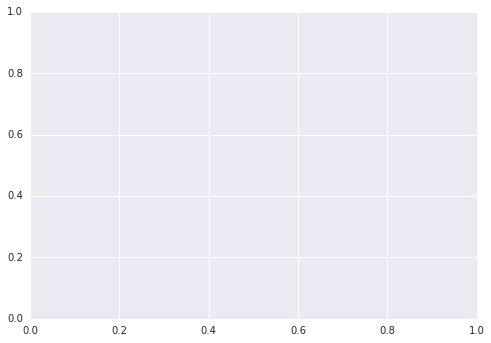

In [27]:
sns.regplot(x=MonthsDF.FlightDate, y=MonthsDF.ArrDelay)

In [ ]:
"""3. Regression analysis"""
#Q1: are we punishing airlines for flying out of bad airports?
#Q2: do seasonal patterns matter more in northern areas with snow? (using lat/long data)
#Q2a: does our hypothesis that busier summer and holiday travel is more important than weather hold up?

In [16]:
#Dummies for each day of the year - we aren't using these at the moment
"""OnTimeData["MonthDay"] = OnTimeData.Month.apply(lambda x: MonthDict[x]).\
    str.cat(OnTimeData.DayofMonth.apply(lambda x: str(x)))
OnTimeData.MonthDay.head()"""

0    June26
1    June16
2    June30
3    June30
4     June7
Name: MonthDay, dtype: object

In [4]:
#Run linear regression of arrival delay time
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

So the linear regression runs out of memory.  I'd like to find a way around this: can't we convert the matrix to sparse somehow?  But for now, will try Lasso and Ridge, followed by researching Principal Component Analysis.

In [5]:
from sklearn.linear_model import Lasso

In [6]:
#Already sparse.  Try Ridge?
from sklearn.linear_model import Ridge
ridge = Ridge(copy_X=False)

In [4]:
#SGDRegressor?
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

In [5]:
#from sklearn.decomposition import PCA
#pca = PCA(copy=False)

In [15]:
#limit to 10
#pca10 = PCA(n_components=10, copy=False)

In [7]:
#Looks like number of components kept is not the limiting factor...
#PCA doesn't support sparse data! http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
#try Truncated SVD

from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD()

In [16]:
#try Ryan's suggestion of setting copy=False
#first with PCA
#pca100 = PCA(n_components=100, copy=False)

In [8]:
#Lasso with copy_x=false
lasso = Lasso(copy_X=False)

In [5]:
OnTimeData.shape

(1490434, 79)

In [6]:
# Try scipy SVD method for sparse matrix
import scipy

Suggestion for creating interactions: test them one at a time to see which add the most to the model once you already have a model
http://www.dummies.com/programming/big-data/data-science/data-science-how-to-create-interactions-between-variables-with-python/
Suspect this will take a long time!

In [5]:
#more efficient way of getting data frame of dummies for each version of the data set
def DummyRegressors(data):
    #Create dummies for airline, origin and destination airports, month, and time of day
    #Drop first column in each data frame to avoid singular matrix
    CarrierDummies = pd.get_dummies(data["Carrier Name"], prefix="C", sparse=True, drop_first=True)
    OriginDummies = pd.get_dummies(data.Origin, prefix="O", sparse=True, drop_first=True)
    DestDummies = pd.get_dummies(data.Dest, prefix="D", sparse=True, drop_first=True)
    MonthDummies = pd.get_dummies(data.Month, prefix="M", sparse=True, drop_first=True)
    TimeDummies = pd.get_dummies(data.DepTimeBlk, prefix="T", sparse=True, drop_first=True)
    
    return pd.concat([CarrierDummies, OriginDummies, DestDummies, MonthDummies, TimeDummies], axis=1)

In [37]:
import inspect

In [38]:
inspect.getargspec(pd.get_dummies)

ArgSpec(args=['data', 'prefix', 'prefix_sep', 'dummy_na', 'columns', 'sparse', 'drop_first'], varargs=None, keywords=None, defaults=(None, '_', False, None, False, False))

In [ ]:
#pca10.fit_transform(RegDum_20, AllAirports_20.ArrDelay)

In [6]:
from sklearn.decomposition import IncrementalPCA, SparsePCA
from scipy.sparse.linalg import svds

In [6]:
ipca10 = IncrementalPCA(n_components=10, batch_size=100000, copy=False)

In [7]:
# code copied from http://stackoverflow.com/questions/17315737/split-a-large-pandas-dataframe

# input - df: a Dataframe, chunkSize: the chunk size
# output - a list of DataFrame
# purpose - splits the DataFrame into smaller of max size chunkSize (last is smaller)
def splitDataFrameIntoSmaller(df, chunkSize = 10000): 
    listOfDf = list()
    numberChunks = len(df) // chunkSize + 1
    for i in range(numberChunks):
        listOfDf.append(df[i*chunkSize:(i+1)*chunkSize])
    return listOfDf

In [8]:
OnTime_NoNull = OnTimeData[np.isfinite(OnTimeData.ArrDelay)]
OnTime_NoNull.shape

(1463652, 79)

In [9]:
Dummies_NoNull = DummyRegressors(OnTime_NoNull)

In [37]:
"""RUN IPCA WITH 10 COMPONENTS"""
for k in range(len(Dummies) // 100000 + 1):
    X, y = Xframes[k], Yframes[k]
    #ipca10.partial_fit(X, y)

In [32]:
Xframes[1].shape

(100000, 716)

In [34]:
Yframes[1].shape

(100000L,)

In [38]:
ipca10.explained_variance_ratio_

array([ 0.03722438,  0.02807732,  0.02483708,  0.02243841,  0.01948677,
        0.01920567,  0.01573949,  0.01479622,  0.0125836 ,  0.0119368 ])

In [39]:
sum(ipca10.explained_variance_ratio_)

0.20632574240460144

In [40]:
ipca10.n_samples_seen_

1490434L

In [41]:
ipca10.n_components_

10

In [42]:
ipca10.components_

array([[ -6.82799532e-03,  -1.76519785e-01,  -4.15762713e-03, ...,
          1.10505221e-02,  -1.01752786e-02,  -6.77829736e-03],
       [ -1.17314166e-02,  -4.98943721e-01,  -4.81020668e-03, ...,
          5.83138132e-03,   1.52279903e-04,   8.67883613e-04],
       [ -3.49976420e-03,  -3.61253553e-01,   9.28062610e-03, ...,
         -5.21919158e-03,  -9.63179886e-03,  -6.15929622e-03],
       ..., 
       [  6.47998412e-03,  -2.83721485e-01,  -5.76603158e-03, ...,
         -1.49926816e-02,  -1.06753623e-02,  -7.67492187e-03],
       [  3.37177464e-02,  -6.14188603e-02,   7.51463852e-04, ...,
          1.31782053e-02,   3.17268122e-02,   5.67225776e-03],
       [ -1.90687479e-02,  -1.02491563e-02,  -3.36555381e-03, ...,
         -6.14812649e-02,  -1.31910808e-02,  -1.14882398e-02]])

In [43]:
IPCA10DF = pd.DataFrame(ipca10.components_)
IPCA10DF

,0,1,2,3,4,5,6,7,8,9,...,706,707,708,709,710,711,712,713,714,715
0,-0.006828,-0.176520,-0.004158,-0.239494,-0.002871,-0.049677,-0.179379,-0.002297,-0.004901,-0.046010,...,-0.001306,-0.001198,0.008045,-0.000518,0.013699,0.008295,0.021374,0.011051,-0.010175,-0.006778
1,-0.011731,-0.498944,-0.004810,0.645418,0.001481,-0.055963,0.084306,-0.007411,-0.004165,0.053504,...,0.000132,0.006357,0.012727,0.008514,-0.009588,0.017742,-0.005195,0.005831,0.000152,0.000868
2,-0.003500,-0.361254,0.009281,-0.360634,-0.000362,-0.014455,0.789357,0.001210,-0.000149,-0.054446,...,0.015587,0.000178,0.013657,0.005144,-0.001208,-0.000427,-0.012558,-0.005219,-0.009632,-0.006159
3,0.022781,-0.509861,0.006063,-0.064183,0.000740,0.056223,-0.357834,0.020249,0.007720,0.013059,...,-0.016608,-0.003464,-0.022195,0.011906,-0.011081,0.003501,-0.000184,0.003649,0.011733,0.006185
4,0.001558,-0.015464,0.001815,0.020177,-0.000220,0.010310,-0.018239,-0.000051,0.000634,0.020434,...,-0.010877,-0.002552,-0.003236,-0.008883,0.006520,-0.000333,0.002875,0.001733,0.002995,0.002143
5,0.002786,0.002868,0.001721,0.008659,-0.000225,0.007563,0.005673,0.000656,-0.000407,0.004315,...,-0.003567,0.000870,-0.000645,-0.006890,-0.001028,-0.002863,0.002525,-0.000103,-0.001008,-0.000218
6,-0.007228,0.073278,-0.004060,0.011721,-0.000714,-0.183457,0.103720,0.009987,-0.001014,-0.176456,...,0.028864,0.055408,0.036433,0.062797,0.016674,0.014535,0.012514,0.009019,0.000579,-0.010210
7,0.006480,-0.283721,-0.005766,-0.056645,0.002973,0.662735,-0.093132,0.001482,0.004745,-0.000375,...,0.006117,-0.014574,0.014857,0.007445,0.016531,-0.013943,-0.011095,-0.014993,-0.010675,-0.007675
8,0.033718,-0.061419,0.000751,-0.070460,0.005829,-0.279605,-0.039718,-0.000147,0.019410,0.154691,...,-0.028526,-0.013498,-0.019337,-0.021608,-0.035275,0.007513,0.021664,0.013178,0.031727,0.005672
9,-0.019069,-0.010249,-0.003366,-0.144789,-0.005467,-0.008921,-0.027572,0.021047,-0.006912,-0.265053,...,0.008035,-0.016239,0.005953,0.048865,0.014558,-0.070728,-0.052338,-0.061481,-0.013191,-0.011488


In [44]:
IPCA10DF.columns = Dummies.columns
IPCA10DF

,Alaska Airlines Inc.,American Airlines Inc.,Continental Air Lines Inc.,Delta Air Lines Inc.,Endeavor Air Inc.,Envoy Air,ExpressJet Airlines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,...,1400-1459,1500-1559,1600-1659,1700-1759,1800-1859,1900-1959,2000-2059,2100-2159,2200-2259,2300-2359
0,-0.006828,-0.176520,-0.004158,-0.239494,-0.002871,-0.049677,-0.179379,-0.002297,-0.004901,-0.046010,...,-0.001306,-0.001198,0.008045,-0.000518,0.013699,0.008295,0.021374,0.011051,-0.010175,-0.006778
1,-0.011731,-0.498944,-0.004810,0.645418,0.001481,-0.055963,0.084306,-0.007411,-0.004165,0.053504,...,0.000132,0.006357,0.012727,0.008514,-0.009588,0.017742,-0.005195,0.005831,0.000152,0.000868
2,-0.003500,-0.361254,0.009281,-0.360634,-0.000362,-0.014455,0.789357,0.001210,-0.000149,-0.054446,...,0.015587,0.000178,0.013657,0.005144,-0.001208,-0.000427,-0.012558,-0.005219,-0.009632,-0.006159
3,0.022781,-0.509861,0.006063,-0.064183,0.000740,0.056223,-0.357834,0.020249,0.007720,0.013059,...,-0.016608,-0.003464,-0.022195,0.011906,-0.011081,0.003501,-0.000184,0.003649,0.011733,0.006185
4,0.001558,-0.015464,0.001815,0.020177,-0.000220,0.010310,-0.018239,-0.000051,0.000634,0.020434,...,-0.010877,-0.002552,-0.003236,-0.008883,0.006520,-0.000333,0.002875,0.001733,0.002995,0.002143
5,0.002786,0.002868,0.001721,0.008659,-0.000225,0.007563,0.005673,0.000656,-0.000407,0.004315,...,-0.003567,0.000870,-0.000645,-0.006890,-0.001028,-0.002863,0.002525,-0.000103,-0.001008,-0.000218
6,-0.007228,0.073278,-0.004060,0.011721,-0.000714,-0.183457,0.103720,0.009987,-0.001014,-0.176456,...,0.028864,0.055408,0.036433,0.062797,0.016674,0.014535,0.012514,0.009019,0.000579,-0.010210
7,0.006480,-0.283721,-0.005766,-0.056645,0.002973,0.662735,-0.093132,0.001482,0.004745,-0.000375,...,0.006117,-0.014574,0.014857,0.007445,0.016531,-0.013943,-0.011095,-0.014993,-0.010675,-0.007675
8,0.033718,-0.061419,0.000751,-0.070460,0.005829,-0.279605,-0.039718,-0.000147,0.019410,0.154691,...,-0.028526,-0.013498,-0.019337,-0.021608,-0.035275,0.007513,0.021664,0.013178,0.031727,0.005672
9,-0.019069,-0.010249,-0.003366,-0.144789,-0.005467,-0.008921,-0.027572,0.021047,-0.006912,-0.265053,...,0.008035,-0.016239,0.005953,0.048865,0.014558,-0.070728,-0.052338,-0.061481,-0.013191,-0.011488


In [33]:
ipca10.get_params()

{'batch_size': 100000, 'copy': False, 'n_components': 10, 'whiten': False}

In [32]:
#Try IPCA with 100 components now
ipca100 = IncrementalPCA(n_components=100, batch_size=100000, copy=False)

In [46]:
"""RUN IPCA WITH 100 COMPONENTS"""
for k in range(len(Dummies) // 100000 + 1):
    X, y = Xframes[k], Yframes[k]
    #ipca100.partial_fit(X, y)

In [47]:
ipca100.n_samples_seen_

1490434L

In [48]:
sum(ipca100.explained_variance_ratio_)

0.8528812594953662

In [49]:
ipca100.explained_variance_ratio_

array([ 0.0419058 ,  0.03223939,  0.02609429,  0.02463642,  0.02021929,
        0.01954252,  0.01921096,  0.01888981,  0.01854193,  0.01844692,
        0.01813319,  0.01790072,  0.01771473,  0.01746719,  0.01637912,
        0.01615398,  0.01606117,  0.01551614,  0.01493321,  0.0147209 ,
        0.01449397,  0.01405294,  0.01403608,  0.01379751,  0.01354645,
        0.01346319,  0.01323352,  0.0131331 ,  0.01300372,  0.0127462 ,
        0.01238754,  0.01141195,  0.01104624,  0.01005439,  0.00944765,
        0.00903488,  0.008403  ,  0.00833613,  0.00812303,  0.00802079,
        0.00781266,  0.00710941,  0.00693556,  0.00642518,  0.00628469,
        0.0059902 ,  0.00576517,  0.00567044,  0.00517003,  0.00509601,
        0.00491261,  0.00474734,  0.00465928,  0.00455657,  0.00434715,
        0.00430954,  0.0042979 ,  0.00414403,  0.00413163,  0.00408095,
        0.00404687,  0.004034  ,  0.00399705,  0.00384369,  0.00372668,
        0.00369752,  0.00365923,  0.00358575,  0.00355314,  0.00

In [50]:
IPCA100DF = pd.DataFrame(ipca100.components_)
IPCA100DF.head()

,0,1,2,3,4,5,6,7,8,9,...,706,707,708,709,710,711,712,713,714,715
0,-0.010272,-0.114965,-0.002175,-0.305496,-0.002122,-0.053256,-0.166268,-0.004189,-0.004689,-0.019303,...,0.000928,-0.003500,0.000482,-0.005991,0.014262,-0.000005,0.016363,0.006917,-0.011741,-0.005716
1,-0.016235,-0.310834,-0.003693,0.758254,-0.001004,-0.105310,-0.103469,-0.008303,-0.006472,-0.026121,...,-0.007604,0.006597,0.007009,0.000659,-0.023664,0.020503,-0.007276,0.005911,0.001927,0.000354
2,-0.004658,-0.514156,0.002655,-0.189528,0.000190,-0.058414,0.764915,0.000553,-0.000537,-0.009926,...,0.011752,0.003918,0.019091,0.006247,-0.010729,0.011715,-0.012406,-0.000785,-0.007980,-0.004410
3,0.016271,-0.465499,0.001348,-0.004291,0.001103,-0.050846,-0.339499,0.013187,0.004395,0.015840,...,-0.029121,0.011944,-0.009434,0.012307,-0.011466,0.003189,-0.000014,0.005528,0.008476,0.003020
4,0.019809,-0.211055,0.004772,-0.002549,0.001007,0.069567,-0.247629,0.009619,0.006634,0.049415,...,-0.005962,-0.024975,-0.032699,-0.002291,-0.001125,0.014587,-0.007919,-0.003364,0.011077,0.010571


In [51]:
IPCA100DF.columns = Dummies.columns
IPCA100DF.head()

,Alaska Airlines Inc.,American Airlines Inc.,Continental Air Lines Inc.,Delta Air Lines Inc.,Endeavor Air Inc.,Envoy Air,ExpressJet Airlines Inc.,Frontier Airlines Inc.,Hawaiian Airlines Inc.,JetBlue Airways,...,1400-1459,1500-1559,1600-1659,1700-1759,1800-1859,1900-1959,2000-2059,2100-2159,2200-2259,2300-2359
0,-0.010272,-0.114965,-0.002175,-0.305496,-0.002122,-0.053256,-0.166268,-0.004189,-0.004689,-0.019303,...,0.000928,-0.003500,0.000482,-0.005991,0.014262,-0.000005,0.016363,0.006917,-0.011741,-0.005716
1,-0.016235,-0.310834,-0.003693,0.758254,-0.001004,-0.105310,-0.103469,-0.008303,-0.006472,-0.026121,...,-0.007604,0.006597,0.007009,0.000659,-0.023664,0.020503,-0.007276,0.005911,0.001927,0.000354
2,-0.004658,-0.514156,0.002655,-0.189528,0.000190,-0.058414,0.764915,0.000553,-0.000537,-0.009926,...,0.011752,0.003918,0.019091,0.006247,-0.010729,0.011715,-0.012406,-0.000785,-0.007980,-0.004410
3,0.016271,-0.465499,0.001348,-0.004291,0.001103,-0.050846,-0.339499,0.013187,0.004395,0.015840,...,-0.029121,0.011944,-0.009434,0.012307,-0.011466,0.003189,-0.000014,0.005528,0.008476,0.003020
4,0.019809,-0.211055,0.004772,-0.002549,0.001007,0.069567,-0.247629,0.009619,0.006634,0.049415,...,-0.005962,-0.024975,-0.032699,-0.002291,-0.001125,0.014587,-0.007919,-0.003364,0.011077,0.010571


In [52]:
IPCA100DF.shape

(100, 716)

In [10]:
sgd = SGDRegressor(penalty='l1')

In [67]:
"""RUN SGD REGRESSOR"""
for k in range(len(Dummies) // 100000 + 1):
    X, y = Xframes[k], Yframes[k]
    #sgd.partial_fit(X, y)

In [68]:
sgd.coef_

array([ -3.93608907e+00,  -2.48490829e+00,  -3.43191858e-01,
        -2.98476825e+00,   8.02623917e-02,  -3.36069922e-01,
         4.26047117e+00,   6.42773518e+00,  -2.18843407e+00,
         4.52459023e+00,   2.50147928e+00,   6.38795248e-01,
         1.84885393e+00,   9.88003543e+00,  -1.19115901e+00,
        -1.15560438e+00,  -3.28480422e+00,   7.88918693e-02,
         9.03799142e-01,   6.53855575e-01,   1.82782346e-01,
         0.00000000e+00,  -3.90643078e-01,   1.71926621e+00,
        -2.15605070e-01,   1.09333998e-02,   6.16909220e-02,
        -1.19032077e-01,   3.86321566e-01,  -2.58443332e-02,
        -1.43439049e+00,   2.02773891e-01,   2.92477077e-01,
         1.26442065e+00,  -2.28643505e-01,  -2.83103696e-01,
         7.67077818e-01,   1.18970060e-01,  -6.00366397e-01,
         3.96423800e-01,   4.13606399e-01,  -3.29675138e-01,
        -8.21442840e-03,  -1.51493860e-01,  -2.34443824e+00,
         2.40635921e-01,   1.11713085e-01,   6.53702087e-02,
        -4.21513418e-01,

In [70]:
sgd.coef_.shape

(716L,)

In [20]:
from sklearn.utils import assert_all_finite

In [21]:
assert_all_finite(Dummies_NoNull)

In [11]:
from sklearn.linear_model import SGDClassifier

In [12]:
sgdc = SGDClassifier(loss='log', penalty='l1')

In [29]:
"""RUN SGD CLASSIFIER"""
for k in range(len(Dummies) // 100000 + 1):
    X, y = Xframes[k], Y2frames[k]
    #sgdc.partial_fit(X, y, classes=[0, 1])

In [30]:
sgdc.coef_

array([[ -5.90577169e-02,   0.00000000e+00,   0.00000000e+00,
         -2.56164335e-01,   1.38636088e-02,  -7.57862358e-02,
          3.83741055e-01,   2.80897184e-01,  -1.01400519e+00,
          3.31608889e-01,   2.34151324e-01,   0.00000000e+00,
          2.19973022e-01,   6.20709647e-01,   9.90669769e-03,
          3.29564388e-02,  -9.95844275e-02,   0.00000000e+00,
          3.72879789e-02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -1.08723416e-02,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

Cross-validation with interaction variables: http://www.dummies.com/programming/big-data/data-science/data-science-how-to-create-interactions-between-variables-with-python/

In [18]:
from sklearn.model_selection import cross_val_score, KFold

In [19]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)

In [39]:
OnTime_NoNull.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Year', u'Quarter', u'Month',
       u'DayofMonth', u'DayOfWeek', u'FlightDate', u'UniqueCarrier',
       u'AirlineID', u'Carrier', u'TailNum', u'FlightNum', u'OriginAirportID',
       u'OriginAirportSeqID', u'OriginCityMarketID', u'Origin',
       u'OriginCityName', u'OriginState', u'OriginStateFips',
       u'OriginStateName', u'OriginWac', u'DestAirportID', u'DestAirportSeqID',
       u'DestCityMarketID', u'Dest', u'DestCityName', u'DestState',
       u'DestStateFips', u'DestStateName', u'DestWac', u'CRSDepTime',
       u'DepTime', u'DepDelay', u'DepDelayMinutes', u'DepDel15',
       u'DepartureDelayGroups', u'DepTimeBlk', u'TaxiOut', u'WheelsOff',
       u'WheelsOn', u'TaxiIn', u'CRSArrTime', u'ArrTime', u'ArrDelay',
       u'ArrDelayMinutes', u'ArrDel15', u'ArrivalDelayGroups', u'ArrTimeBlk',
       u'Cancelled', u'CancellationCode', u'CRSElapsedTime',
       u'ActualElapsedTime', u'AirTime', u'Flights', u'Distance',
       u'DistanceGroup',

Modify code from http://www.dummies.com/programming/big-data/data-science/data-science-how-to-create-interactions-between-variables-with-python/ to allow cross-validation in batches because my data set is too large

In [36]:
def test_interactions_in_batches(X_batches, Y_batches, reg):
    assert len(X_batches) == len(Y_batches)

    #Create dictionary of possible interactions to store cross-validation scores
    interactions_dict = {}

    #Loop through batches on both X and Y
    for i in range(len(X_batches)):
        X, Y = X_batches[i], Y_batches[i]

        #Baseline is regression with no interactions
        reg.partial_fit(X, Y)
        baseline = reg.score(X, Y)
        
    print baseline
    
    
    #Test all possible pairs of interactions where the first letter of the two variables is not the same
    #Carriers begin with "C", origin with "O", departure with "D", month with "M", time with "T"
    for feat_A in X.columns:
        for feat_B in [name for name in X.columns if name[0] != feat_A[0]]:

            for i in range(len(X_batches)):
                X, Y = X_batches[i], Y_batches[i]
                X['inter'] = (X[feat_A].to_dense() * X[feat_B].to_dense()).to_sparse()
                reg.partial_fit(X, Y)
                score = reg.score(X, Y)

            #Add interaction to dictionary if not there, and create list of score improvements across batches
            if (feat_A, feat_B) not in interactions_dict.keys():
                interactions_dict[(feat_A, feat_B)] = [round(score - baseline, 3)]
            else:
                interactions_dict[(feat_A, feat_B)].append(round(score - baseline, 3))

    #Create data frame of average score improvements over all batches
    inter_avg_dict = {}
    for x in interactions_dict.keys():
        inter_avg_dict[x] = np.mean(interactions_dict[x])
    return pd.DataFrame(inter_avg_dict)

In [15]:
#do cross-validation on training set only
from sklearn.model_selection import train_test_split

In [29]:
#Oops, try again
X_train, X_test, Y_train, Y_test = train_test_split(Dummies_NoNull, OnTime_NoNull.ArrDelay)

In [30]:
print X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

(1097739, 716) (1097739L,) (365913, 716) (365913L,)


In [18]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(Dummies_NoNull, OnTime_NoNull.ArrDel15)

In [19]:
print X2_train.shape, Y2_train.shape, X2_test.shape, Y2_test.shape

(1097739, 716) (1097739L,) (365913, 716) (365913L,)


In [37]:
Xframes = splitDataFrameIntoSmaller(X_train, chunkSize = 100000)
Yframes = splitDataFrameIntoSmaller(Y_train, chunkSize = 100000)
X2frames = splitDataFrameIntoSmaller(X2_train, chunkSize = 100000)
Y2frames = splitDataFrameIntoSmaller(Y2_train, chunkSize = 100000)

In [38]:
test_interactions_in_batches(Xframes, Yframes, sgd)

0.0295622029669


ValueError: Number of features 717 does not match previous data 716.

In [39]:
Xframes[0].shape

(100000, 717)

In [40]:
Xframes[1].shape

(100000, 716)

In [41]:
Xframes[3].shape

(100000, 716)

In [26]:
Xframes[0].columns

Index([u'C_Alaska Airlines Inc.', u'C_American Airlines Inc.',
       u'C_Continental Air Lines Inc.', u'C_Delta Air Lines Inc.',
       u'C_Endeavor Air Inc.', u'C_Envoy Air', u'C_ExpressJet Airlines Inc.',
       u'C_Frontier Airlines Inc.', u'C_Hawaiian Airlines Inc.',
       u'C_JetBlue Airways',
       ...
       u'T_1500-1559', u'T_1600-1659', u'T_1700-1759', u'T_1800-1859',
       u'T_1900-1959', u'T_2000-2059', u'T_2100-2159', u'T_2200-2259',
       u'T_2300-2359', u'inter'],
      dtype='object', length=717)

In [44]:
len(Xframes[0]['O_ANC'])

100000

In [45]:
type(Xframes[0]['O_ANC'])

pandas.sparse.series.SparseSeries

In [31]:
sgd

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [33]:
OnTimeData['DepFlightsPerAirport'] = OnTimeData.groupby('Origin')['Origin'].transform('count')

In [36]:
OnTimeData['ArrFlightsPerAirport'] = OnTimeData.groupby('Dest')['Dest'].transform('count')

In [37]:
Airports2k = OnTimeData[OnTimeData.DepFlightsPerAirport >= 2000][OnTimeData.ArrFlightsPerAirport >= 2000]

C:\Users\Will\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [38]:
Airports2k.shape

(1256820, 81)

In [39]:
Airports2k_NoNull = Airports2k[np.isfinite(Airports2k.ArrDelay)]

In [40]:
Airports2k_NoNull.shape

(1236214, 81)

In [41]:
Dummies_2k_NoNull = DummyRegressors(Airports2k_NoNull)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(Dummies_2k_NoNull, Airports2k_NoNull.ArrDelay)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(Dummies_2k_NoNull, Airports2k_NoNull.ArrDel15)

In [43]:
Xframes = splitDataFrameIntoSmaller(X_train, chunkSize = 100000)
Yframes = splitDataFrameIntoSmaller(Y_train, chunkSize = 100000)
X2frames = splitDataFrameIntoSmaller(X2_train, chunkSize = 100000)
Y2frames = splitDataFrameIntoSmaller(Y2_train, chunkSize = 100000)

In [45]:
#Try with 5k per airport instead...
Airports5k = OnTimeData[OnTimeData.DepFlightsPerAirport >= 5000][OnTimeData.ArrFlightsPerAirport >= 5000]

C:\Users\Will\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [47]:
Airports5k_NoNull = Airports5k[np.isfinite(Airports5k.ArrDelay)]

In [48]:
Dummies_5k_NoNull = DummyRegressors(Airports5k_NoNull)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(Dummies_5k_NoNull, Airports5k_NoNull.ArrDelay)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(Dummies_5k_NoNull, Airports5k_NoNull.ArrDel15)
Xframes = splitDataFrameIntoSmaller(X_train, chunkSize = 100000)
Yframes = splitDataFrameIntoSmaller(Y_train, chunkSize = 100000)
X2frames = splitDataFrameIntoSmaller(X2_train, chunkSize = 100000)
Y2frames = splitDataFrameIntoSmaller(Y2_train, chunkSize = 100000)

In [50]:
test_interactions_in_batches(Xframes, Yframes, sgd)

KeyboardInterrupt: 

In [51]:
Airports5k_NoNull.shape

(1009172, 81)

In [52]:
X_train.shape

(756879, 166)

In [53]:
X2_train.shape

(756879, 166)